# **Wilkommen zur interaktiven Vorlesung zum Thema "Budyko und die klimatische Wasserbilanz"**

<img src="https://www.uni-potsdam.de/fileadmin/projects/zim/migrated_contents/Unilogo_01.jpg" alt="logo" width="70" align="center"/>

**Sebastian Gnann, Daniel Kretschmer, Thorsten Wagener**


Bei Fragen und Feedback wenden Sie sich bitte an: gnann1@uni-potsdam.de

---

Die Online-Vorlesung basiert auf einem sogenannten Jupyter Notebook (https://jupyter.org/). 
Ein Notebook besteht aus einzelnen Zellen, die entweder Markdown-Text oder Python-Code beinhalten.
In dieser Vorlesung sollen Sie sich durch die einzelnen Zellen klicken und interaktiv und mit echten Daten an das Thema herangeführt werden.

In dieser Online-Vorlesung geht es um Budyko und die klimatische Wasserbilanz. Grundlagen der Hydrologie werden vorausgesetzt. Sie sollten z.B. wissen, was Hydrologie ist, die wichtigsten hydrologischen Variablen kennen und schon mal von der Wasserbilanz und dem Wasserkreislauf gehört haben. Eine kurze Einführung gibt es ansonsten auch auf Wikipedia (https://de.wikipedia.org/wiki/Hydrologie) oder in verschiedenen Sachbüchern (z.B. https://www.utb.de/doi/book/10.36198/9783838545134).


## Struktur der Vorlesung

I. Jupyter Notebooks: eine kurze Einführung

II. Budyko and die klimatische Wasserbilanz

III. Lösungsvorschläge und zusätzliche Informationen


# **I. Jupyter Notebooks: eine kurze Einführung**

### **Informationen zu Jupyer Notebooks**

Bitte lassen Sie das gesamte Notebook von vorne laufen, so dass alle Python-Module und die Daten in der richtigen Reihenfolge geladen werden.
Hierzu drücken Sie zuerst auf das "Restart the kernel" Symbol. 
Danach können Sie jeden Abschnitt ausführen indem Sie auf das "Run the selected cells and advance" Symbol klicken.
Nun können Sie sich Stück für Stück durch interaktive Vorlesung klicken. 

<img src="figures/jupyter_explanation.png" alt="drawing" width=800/>

### **Informationen zu Python**

Python ist eine vielgenutzte Programmiersprache. Python kann genutzt werden um Datensätze zu analysieren, Berechnungen anzustellen und Daten zu visualisieren.

Sie müssen selbst nicht programmieren, aber sich den Code anzuschauen hilft dabei zu verstehen, was genau in der Analyse passiert.
Kommentare werden mit einem # gekennzeichnet (sie werden nicht ausgeführt). 
Funktionen beginnen immer mit "def" und können auch eingeklappt werden, um die Lesbarkeit des Notebooks zu erhöhen.
Code wird meistens - wie die Programmiersprache selbst - auf Englisch geschrieben, so dass möglichst viele Leute den Code nutzen können.

Nachstehend sehen Sie ein kurzes Beispiel wie ein typischer Code-Schnipsel aufgebaut ist.


In [1]:
# define function that calculates the square of a number
def square(x):
    
    # define new variable y is the square of the number x
    y = x * x
    
    # this returns z to the user
    return y

# call function to calculate the square of 2
squared_value = square(2)

# print the resulting value
print("The resulting value is:", squared_value)

The resulting value is: 4


### **Notwendige Python Packages**
Es gibt verschieden sogenannte Packages für Python, die bestimme Funktionen ausführen. 
Manche Packages helfen beim Erstellen von Grafiken, andere erledigen bestimmte Rechenaufgaben (z.B. statistische Tests).
Diese müssen am Anfang importiert werden. Wird das nicht gemacht, kann der nachstehende Code nicht ausgeführt werden.

In [2]:
# import all necessary Python packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets

# import helper functions
from functions import helper_fcts

### **Information zu den Datensätzen**

Wir nutzen den sogenannten CAMELS US Datensatz (Newman et al., 2015; Addor et al., 2017).
CAMELS US ist ein Datensatz, der Daten für 671 Einzugsgebiete in den USA enthält (siehe unten stehende Grafik). 
Für jedes Einzugsgebiet enthalten die Datensätze Zeitreihen von Niederschlag, Abfluss, potenzieller Verdunstung, etc., sowie Einzugsgebietseigenschaften wie die Größe des Einzugsgebiets oder die topographische Höhe. 
Diese Daten werden mithilfte des unten stehenden Codes geladen.

<img src="figures/map_CAMELS_US.png" alt="drawing" width=400/>


**Quellen**

Newman, A. J., Clark, M. P., Sampson, K., Wood, A., Hay, L. E., Bock, A., ... & Duan, Q. (2015). Development of a large-sample watershed-scale hydrometeorological data set for the contiguous USA: data set characteristics and assessment of regional variability in hydrologic model performance. Hydrology and Earth System Sciences, 19(1), 209-223.

Addor, N., Newman, A. J., Mizukami, N., & Clark, M. P. (2017). The CAMELS data set: catchment attributes and meteorology for large-sample studies. Hydrology and Earth System Sciences, 21(10), 5293-5313.

In [3]:
# load data into workspace
df = pd.read_csv("results/camels_US_processed.csv")

### Wichtigste Variablen

Im Folgenden nutzen wir hauptsächlich die folgenden Variablen.

| Name | Abkürzung |Einheit|
|:-----|:-----|:-----|
| Niederschlag | $P$ | mm/y |
| Potentielle Verdunstung | $PET$ | mm/y |
| Tatsächliche Verdunstung | $AET$ | mm/y |
| Abfluss | $Q$ | mm/y |
| Speicheränderung | $\Delta S$ | mm/y |
| Nettostrahlung | $R_n$ | W/m² |
| Latente Wärme | $L$ | W/m² |
| Fühlbare Wärme | $H$ | W/m² |
| Bodenwärmefluss | $G$ | W/m² |


Wir schauen uns die Wasserbilanz verschiedener Einzugsgebiete an. Ein Einzugsgebiet ist definiert als das Gebiet, das zu einem Punkt (z.B. Pegelmessstelle eines Flusses) hin entwässert, primär bedingt durch die Topographie. 

# **II. Budyko and die klimatische Wasserbilanz**

Dieser Abschnitt beinhaltet den Kern der Vorlesung, inklusive Hintergrund, Theorie, sowie interaktive Datenanalyse und Visualisierung.
Im Laufe der Notebooks werden verschiedene <span style="color:Indigo">**Fragen**</span> gestellt, die Sie beantworten sollen um die <span style="color:DarkRed">**Lernziele**</span> zu erreichen.



**Übersicht**

1. Einführung
2. Die klimatische Wasserbilanz 
3. Die Budyko-Kurve
4. Abweichungen von der Budyko-Kurve
5. Die Wasserbilanz für verschiedene Jahre

## **1. Einführung**

<span style="color:DarkRed">**Lernziel**: *Sie sollten die wichtigsten Kenngrößen der klimatischen Wasserbilanz kennen und den Zusammenhang zwischen Wasser- und Energiebilanz erläutern können.*</span>

### **1.1 Mikhail Ivanovich Budyko (20.01.1920 – 10.12.2001)**

In den Jahren 1955-1974 studierte Mikhail Budyko ([Bildquelle mit Biographie](https://public.wmo.int/en/about-us/awards/international-meteorological-organization-imo-prize/mikhail-ivanovich-budyko)) im Rahmen seiner Forschungen die Komponenten der Land- und Meeresenergiebilanz, was in Russland und darüber hinaus weithin anerkannt wurde und den Grundstein für einen neuen Bereich der Meteorologie legte - die physikalische Klimatologie (Theorie des Klimas). 

<img src="https://ane4bf-datap1.s3-eu-west-1.amazonaws.com/wmocms/s3fs-public/styles/featured_media_detail/public/advanced_page/featured_media/Budyko.png?sVsiFNvfuHQf792994VKiDrakKn_AGLD&itok=bpEQF8dL" alt="drawing" width="250"/>


### **1.2 Die langfristige Wasserbilanz eines Einzugsgebiets**

Die Wasserbilanz eines Einzugsgebiets kann wie folgt beschrieben werden:

\begin{equation}
\tag{1}
P + Q_{in} = AET + Q_{out} + \Delta S \label{water_balance}
\end{equation}

wobei $P$ den Niederschlag beschreibt, $AET$ die tatsächliche Verdunstung, $Q_{in}$ den Zufluss (ober- und unterirdisch), $Q_{out}$ den Abfluss (ober- und unterirdisch) und $\Delta S$ die Speicheränderung im Einzugsgebiet (alle in mm/y).

Budyko nimmt an, dass für große Einzugsgebiete ($\gg$1000 km²) unterirdische Zu- und Abflüsse vernachlässigbar sind und dass für lange Zeiträume (30 Jahre und länger) die Änderung des Speichers gegen null geht. 
Die langfristige Wasserbilanz für große Einzugsgebiete ist dann:

\begin{equation}
\tag{2}
P = AET + Q \label{water_balance_Budyko}
\end{equation}

<img src="figures/water_balance.png" alt="drawing" width=250/>

Gleichung (2) nimmt also an, dass sämtliche Wasser-Inputs in ein Einzugsgebiet vom Niederschlag stammen und sämtliche Wasser-Outputs in Form von Verdunstung oder (oberirdischem) Abfluss stattfinden.

### **1.3 Die Energiebilanz an der Landoberfläche**
Die Energiebilanz an der Landoberfläche kann (vereinfacht) wie folgt beschrieben werden:

\begin{equation}
\tag{3}
R_n = L + H + G \label{energy_balance}
\end{equation}

wobei $R_n$ die Nettostrahlung beschreibt, $L$ die latente Wärme, $H$ die sensible Wärme und $G$ den Bodenwärmefluss (alle in W/m²).

<img src="figures/energy_balance.png" alt="drawing" width=100/>

Die Nettostrahlung liefert also alle Energie, die dann in latente Wärme, fühlbare Wärme oder Bodenwärmefluss umgewandelt wird.


### **1.4 Der Zusammenhang zwischen Wasser- und Energiebilanz**

Die latente Wärme kann auch über die tatsächliche Verdunstung ausgedrückt werden:

\begin{equation}
\tag{4}
L = \lambda_w AET \label{latent_heat}
\end{equation}

wobei $\lambda_w$ die Verdunstungsenthalpie ist, also die Menge an Energie, die es braucht um eine bestimmte Menge an Wasser zu verdampfen (diese ist leicht abhängig von der Temperatur $T$). 

Der Bodenwärmestrom wird häufig vernachlässigt, so dass sich folgende Gleichung ergibt:

\begin{equation}
\tag{5}
R_n = \lambda_w AET + H \label{energy_and_water_balance}
\end{equation}

Gleichung (5) verbindet nun also die Wasserbilanz mit der Energiebilanz und ist somit eine wichtige Grundlage der Hydroklimatologie.

Außerdem definieren wir nun noch die potentielle Verdunstung $PET$. Das ist die Menge an Wasser, die verdunstet werden könnte, wenn immer genügend Wasser vorhanden wäre (z.B. über einem See). 
Diese kann über die Nettostrahlung (also der vorhandenen Energie) genähert werden:

\begin{equation}
\tag{6}
PET = \frac{R_n}{\lambda_w} \label{potential_evaporation}
\end{equation}

Es gibt auch noch weitere Berechnungsformeln für die potentielle Verdunstung, diese werden allerdings hier nicht behandelt.

Drückt man nun Gleichung (5) mithilfe der potentiellen Verdunstung aus, ergibt sich folgende Gleichung:

\begin{equation}
\tag{7}
PET = AET + \frac{H}{\lambda_w} \label{pet_and_water_balance}
\end{equation}

Die Nettostrahlung bzw. potentielle Verdunstung, die nicht dazu beiträgt Wasser zu verdunsten, wird in fühlbare Wärme umgewandelt.

<span style="color:Indigo">**Einfache Frage**: *Zwei Einzugsgebiete erhalten die gleiche Menge an Niederschlag, jedoch unterschiedliche Mengen an Nettostrahlung. Welches der Einzugsgebiete hat einen höheren Abfluss und wie kann man das erklären?*</span>

<span style="color:Indigo">**Schwere Frage**: *Heutzutage wird häufig vom Konzept "Schwammstadt" gesprochen: es soll mehr Wasser in den Städten zurückgehalten werden. Was für Auswirkungen hat eine Zunahme an verfügbarem Wasser auf die Umwandlung der Nettostrahlung (Gleichung 6) und was hat das für einen Einfluss auf das Stadtklima (z.B. die Temperatur)?*</span>

## **2. Die klimatische Wasserbilanz** 

<span style="color:DarkRed">**Lernziel**: *Sie sollten erklären können, was die klimatische Wasserbilanz ist und wieso die Einteilung von Einzugsgebieten in wasser- und energie-limitiert nützlich ist.*</span>

### **2.1 Der Trockenheitsindex**
Die klimatische Wasserbilanz ist definiert als $P - PET$.
Sie ist eng verwandt mit dem sogenannten Trockenheitsindex $\phi$ (manchmal auch Aridität genannt):

\begin{equation}
\tag{8}
\phi = \frac{PET}{P} \label{aridity_index}
\end{equation}

### **2.2 Energie- und wasser-limitierte Gebiete**
Gebiete, in denen $P$ größer als $PET$ (bzw. $\phi < 1$) ist, werden als **energie-limitiert** bezeichnet. 
In energie-limitierten Gebieten kann (fast) alle Energie genutzt werden ($PET \approx AET$).

Gebiete, in denen $P$ kleiner als $PET$ (bzw. $\phi > 1$) ist, werden als **wasser-limitiert** bezeichnet.
In solchen Gebieten kann nicht alle Energie genutzt werden um Wasser zu verdunsten, da nicht genügend Wasser vorhanden ist. 
Die Energie, die nicht genutzt wird um Wasser zu verdunsten, wird in fühlbare Wärme $H$ umgewandelt.


### **2.3 Der Zusammenhang zwischen klimatischer Wasserbilanz und Abfluss**
Im folgenden sehen Sie einen Plot, der den Abfluss gegen die klimatische Wasserbilanz zeigt. 

<span style="color:Indigo">**Einfache Frage**: *Nennen Sie einen Unterschied zwischen wasser- und energie-limitierten Gebieten und erklären Sie diesen.*</span>

<span style="color:Indigo">**Schwere Frage**: *Wie unterscheidet sich der niedrigste Wert, den der Abfluss $Q$ annehmen kann zwischen wasser- und energie-limitierten Gebieten?*</span>

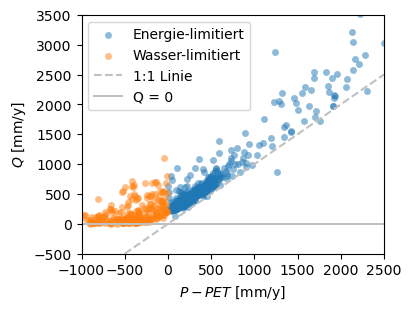

In [4]:
# define function that plots the climatic water balance against streamflow
def plot_climatic_water_balance(*args):
        
    # create figure
    fig = plt.figure(figsize=(4, 3), constrained_layout=True) 
    axes = plt.axes()
    
    # plot climatic water balance against streamflow separated into energy- and water-limited catchments
    # to get annual values we multiply the daily values by 365
    im = axes.scatter(df.loc[df["aridity_class"] == 0, "climatic_water_balance"]*365, 
                      df.loc[df["aridity_class"] == 0, "streamflow"]*365,
                      s=25, c="tab:blue", alpha=0.5, lw=0, label='Energie-limitiert')#, 
    im = axes.scatter(df.loc[df["aridity_class"] == 1, "climatic_water_balance"]*365, 
                      df.loc[df["aridity_class"] == 1, "streamflow"]*365,
                      s=25, c="tab:orange", alpha=0.5, lw=0, label='Wasser-limitiert')#,
    
    # plot 1:1 lineand horizontal line at y=0
    axes.axline((0, 0), slope=1, c='silver', label='1:1 Linie', linestyle='--')
    axes.axhline(c='silver', label='Q = 0')
    
    # specify axes, labels, etc.
    axes.set_xlabel("$P - PET$ [mm/y]")
    axes.set_ylabel("$Q$ [mm/y]")
    axes.set_xlim([-1000, 2500])
    axes.set_ylim([-500, 3500])
    axes.legend(loc='best')
    plt.show()
    
# run the function
plot_climatic_water_balance()

%matplotlib inline

## **3. Die Budyko-Kurve**

<span style="color:DarkRed">**Lernziel**: *Sie sollten die Herleitung der Budyko-Kurve erläutern können und erkären können, weshalb manche Einzugsgebiete außerhalb der Limits liegen.*</span>

### **3.1 Das Energie- und das Wasser-Limit als Grundlage der Budyko-Kurve**
Die Unterteilung in wasser- und energielimitiert bildet die Grundlage von Budykos Kurve. 

In energie-limitierten Gebieten (z.B. feuchte Gebiete wie Schottland oder Schweden) nähert sich die tatsächliche Verdunstung der potentiellen Verdunstung an.

\begin{equation}
%\tag{}
AET \rightarrow PET \label{}
\end{equation}

In wasser-limitierten Gebieten (z.B. trockene Gebiete wie Südspanien oder die Sahara) nähert sich die Verdunstung dem Niederschlag an.

\begin{equation}
%\tag{}
AET \rightarrow P \label{}
\end{equation}

Wir definieren nun neben dem Trockenheitsindex $\phi$ noch den sogenannten Verdunstungsindex $\psi$:

\begin{equation}
\tag{9}
\psi = \frac{AET}{P} \label{evaporative_faction}
\end{equation}

Für zunehmend energie-limitierte ("humide") Gebiete, nähert sich der Verdunstungsindex dem Trockenheitsindex an, da alle Energie für die Verdunstung genutzt wird.
Für zunehmend wasser-limitierte ("aride") Gebiete, nähert sich der Verdunstungsindex 1 an, da der ganze Niederschlag verdunstet.

### **3.2 Budykos ursprüngliche Kurve**
Bildet man nun den Verdunstungsindex als Funktion des Trockenheitsindex ab, so ist der Verdunstungsindex für humide Gebiete von der vorhandenen Energie limitiert und für aride Gebiete vom vorhandenen Wasser limitiert. 
 
Budyko hat nun den Trockenheitsindex $\phi$ und den Verdunstungsindex $\psi$ von echten Einzugsgebieten geneinander aufgetragen und festgestellt, dass die Einzugsgebiete einer Kurve folgen.
Diese Kurve hat er, basierend auf Ergebnissen früherer Forschungsarbeiten anderer Forscher, mit der folgenden Formel genähert:

\begin{equation}
\tag{10}
\psi = [\phi \tanh(1/\phi) (1 - \exp(-\phi))]^{1/2} \label{budyko_equation}
\end{equation}

Diese Formel entspricht einer Kurve, die sich dem Energie- bzw. Wasserlimit annähert und gut zu den von Budyko untersuchten Einzugsgebieten passt, ist aber rein empirisch. Die unten gezeigte Grafik zeigt das Energie- bzw. Wasserlimit sowie Budykos Kurve.

<img src="figures/Budyko_curve.png" alt="drawing" width="400"/>

### **3.3 Echte Einzugsgebietsdaten im "Budyko-Raum"**
Nun schauen wir uns das ganze mit echten Daten an. Wir nutzen 671 Einzugsgebiete aus dem CAMELS-Datensatz, der oben vorgestellt wurde.
Da es normalerweise keine direkten Messungen der Verdunstung in einem Einzugsgebiet gibt, nutzen wir Abflussdaten, die wir mithilfe von Gleichung (2) in Verdunstung umrechnen ($AET = P - Q$).

\begin{equation}
\tag{11}
\psi = \frac{AET}{P} = \frac{P - Q}{P} = 1 - \frac{Q}{P}  \label{evaporative_fraction_using_Q}
\end{equation}


Der unten angezeigte Plot zeigt, dass die meisten Datenpunkte den von Budyko postulierten Grenzen folgen. Die Kurve passt zwar nicht perfekt, gibt aber den generellen Trend gut wieder. Es ist wichtig zu beachten, dass diese Daten unabhängig von den von Budyko genutzten Daten sind.

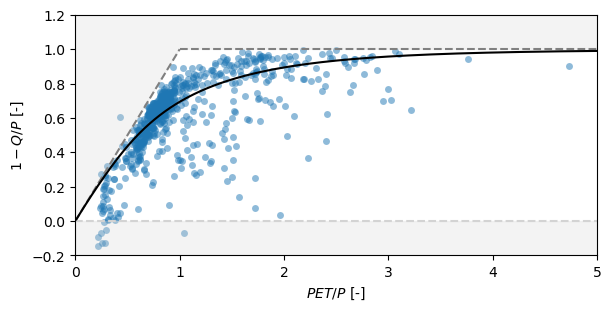

In [5]:
def plot_Budyko(plot_curve=False,*args):
    
    # create figure
    fig = plt.figure(figsize=(6, 3), constrained_layout=True)
    axes = plt.axes()
    
    # plot catchments in Budyko space
    im = axes.scatter(df["aridity"], 1-df["runoff_ratio"], s=25, alpha=0.5, lw=0) 
    
    # specify axes, labels, etc.
    axes.set_xlabel("$PET/P$ [-]")
    axes.set_ylabel("$1 - Q/P$ [-]")
    axes.set_xlim([0, 5])
    axes.set_ylim([-0.2, 1.2])
    helper_fcts.plot_Budyko_limits(df["aridity"], df["runoff_ratio"], axes)
    #axes.set_xscale('log')
    
    # plot Budyko curve
    if plot_curve == True:
        helper_fcts.plot_Budyko_curve(np.linspace(0.01,10,1000), axes)
        
    plt.show()

# this function plots catchments in Budyko space as well as the Budyko curve
plot_Budyko(plot_curve=True) 

%matplotlib inline

<span style="color:DarkBlue">**Frage**: *Manche Punkte liegen außerhalb der theoretischen Grenzen (im grauen Bereich). Welche Gründe könnte es dafür geben? Nennen Sie mindestens zwei.*</span>

**Hinweis**: Im folgenden werden wir diese Punkte nicht mehr betrachten, sondern uns auf die Punkte innerhalb der Limits konzentrieren.

In [6]:
# remove points outside limits
df.loc[np.logical_or((1-df["runoff_ratio"])<0,(1-df["runoff_ratio"])>df["aridity"])] = np.nan

## **4. Abweichungen von der Budyko-Kurve**

<span style="color:DarkRed">**Lernziel**: *Sie sollten verschiedene Gründe dafür nennen können, weshalb manche Einzugsgebiete von der Budyko-Kurve abweichen und diskutieren können, welche Gründe für bestimmte Gebiete plausibel sind.*</span>

### **4.1 Quantifizierung der Abweichung**
Wie man sehen kann, liegen nicht alle Einzugsgebiete auf der Budyko-Kurve. Abgesehen von Unsicherheiten in den Daten, welche Gründe könnte es für eine Abweichung von der Linie geben? Um diese Frage zu beantworten, wollen wir zuerst die Abweichungen von der Kurve quantifizieren. 

Hierzu berechnen wir für jedes Einzugsgebiet den Verdunstungsindex basierend auf Budykos Kurve indem wir den Trockenheitsindex des Einzugsgebiets in Gleichung (8) einsetzen.

Nun können wir den tatsächlichen Verdunstungsindex (genähert als $1 - Q/P$) mit dem berechneten Verdunstungsindex (Gleichung 8) vergleichen. Wir berechnen die Differenz der beiden Werte, die sogenannte Budyko-Anomalie. Je weiter der Wert unterhalb der Kurve ist, desto negativer ist er und je weiter der Wert oberhalb der Kurve ist, desto positiver ist er. Das können Sie in der folgenden Grafik sehen.


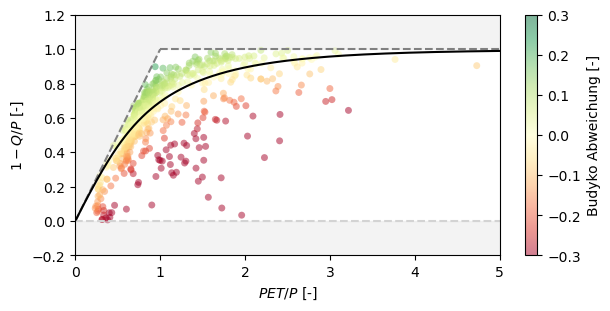

In [7]:
# define function that creates a Budyko plot coloured according to Budyko anomalies
def plot_Budyko_anomaly(*args):
    
    #todo: add dict for z name and unit
    
    # create figure
    fig = plt.figure(figsize=(6, 3), constrained_layout=True)
    axes = plt.axes()
    
    # plot catchments in Budyko space coloured according to Budyko anomalies
    im = axes.scatter(df["aridity"], 1-df["runoff_ratio"], s=25, c=df["Budyko_anomaly"], alpha=0.5, lw=0, cmap='RdYlGn') 
    
    # specify axes, labels, etc.
    axes.set_xlabel("$PET/P$ [-]")
    axes.set_ylabel("$1 - Q/P$ [-]")
    axes.set_xlim([0, 5])
    axes.set_ylim([-0.2, 1.2])
    helper_fcts.plot_Budyko_limits(df["aridity"], df["runoff_ratio"], axes)
    helper_fcts.plot_Budyko_curve(np.linspace(0.01,10,1000), axes)   
    #axes.set_xscale('log')
    cbar = fig.colorbar(im, ax=axes)
    cbar.set_label("Budyko Abweichung [-]")   
    cbar.mappable.set_clim(vmin=-0.3,vmax=0.3)
    
    plt.show()

# run the function
plot_Budyko_anomaly()

%matplotlib inline

### **4.2 Gründe weshalb nicht alle Einzugsgebiete auf einer Kurve liegen**

<span style="color:DarkBlue">**Frage**: *Überlegen Sie sich mindestens drei Gründe (Hypothesen) für die Abweichungen von der Budyko-Kurve und testen Sie diese mit echten Daten. (Diese Frage wird im Folgenden genauer erläutert.)*</span>

Nutzen Sie ein KI-Tool (kümstliche Intelligenz) um Gründe für die Abweichungen von der Budyko-Kurve herauszufinden, wie z.B. https://www.perplexity.ai/ oder https://openai.com/chatgpt. Perplexity.ai ist ein englischsprachiges Tool, das Quellen angibt. ChatGTP versteht verschiedene Sprachen, gibt aber keine Quellen an.

<span style="color:DarkBlue">**Zusatzfrage**: *Was für Vor- und Nachteile haben verschiedene KI-Tools?*</span>

Im nächsten Abschnitt können sie verschiedene Hypotheses zur Erklärung der Abweichungen mit Daten überprüfen.
Um herauszufinden, welche Gründe die Abweichungen verursachen könnten, können wir verschiedene Einzugsgebietseigenschaften nutzen.
Das sind Werte, die bestimmte Eigenschaften eines Einzugsgebiets zusammenfassen; z.B. die durchschnittliche Höhe, der Wald-Anteil, oder der Anteil an Regen, der als Schnee fällt.

Hier sollen Sie zwei Möglichkeiten nutzen, um die Gründe für Abweichungen von der Budyko-Kurve zu untersuchen. 
Zum einen kann man die Punkte im Budyko-Graph der Einzugsgebietseigenschaft entsprechend einfärben - daran lassen sich oft Muster erkennen.
Zum anderen kann man die Abweichungen von der Budyko-Kurve, wie wir sie vorhin berechnet haben, mit den Einzugsgebietseigenschaften vergleichen. 
Das geht sowohl graphisch als auch über die Korrelation. Diese beschreibt eine Beziehung zwischen zwei Variablen mit einem Wert zwischen -1 und 1.
Werte nahe 1 deuten einen starken Zusammenhang an. Werte nahe -1 deuten einen starken umgekehrter Zusammenhang an. Werte nahe 0 deuten an, dass kein Zusammenhang besteht.

Aber, wie man in jeder Statistikvorlesung lernt: Korrelation ist nicht gleich Kausalität. 
Außerdem quantifiziert die Korrelation nur lineare Zusammenhänge und kann daher bestimmte (kompliziertere) Zusammenhänge nicht identifizieren.
Deswegen sollten Sie sich auch Gedanken machen, welche Nachteile diese Art der Analyse hat und was für Lösungen es geben könnte.

Weitere Informationen finden Sie auch hier: https://en.wikipedia.org/wiki/Correlation 

In [29]:
# define function that creates Budyko plot coloured according to catchment attributes
def plot_Budyko_attributes(x):
    
    dict_attributes = {'Pegel-ID': 'gauge_id',
                'Pegel-Name': 'gauge_name',
                'Einzugsgebietsfläche [km²]': 'area_gages2',
                'Saisonalität des Niederschlags [-]': 'p_seasonality',
                'Schnee-Anteil des Niederschlags [-]': 'frac_snow',
                'Häufigkeit niederschlagsreicher Tage [%]': 'high_prec_freq',
                'Wald-Anteil [-]': 'frac_forest',
                'Topographische Steigung [m/km]': 'slope_mean',
                'Topographische Höhe [m]': 'elev_mean',
                'Bodentiefe [m]': 'soil_depth_pelletier',
                'Ton-Anteil im Boden [-]': 'clay_frac',
                'Anteil Carbonatgestein [-]': 'carbonate_rocks_frac',
                'Geologische Durchlässigkeit [m²]': 'geol_permeability'}
    
    dict_explantions = {'Einzugsgebietsfläche [km²]': 'Fläche des (topographischen) Einzugsgebiets.',
              'Saisonalität des Niederschlags [-]': 'Negative (positive) Werte zeigen an, dass mehr Niederschlag im Winter (Sommer) fällt.', 
              'Schnee-Anteil des Niederschlags [-]': 'Der Anteil des Niederschlags, der als Schnee fällt.', 
              'Häufigkeit niederschlagsreicher Tage [%]': 'Die Häufigkeit von niederschlagsreichen Tagen (≥ 5 mal mittlerer Tagesniederschlag).',
              'Wald-Anteil [-]': 'Der Anteil des Einzugsgebiets, der mit Wald bedeckt ist.', 
              'Topographische Steigung [m/km]': 'Die durchschnittliche topographische Steigung im Einzugebiet.', 
              'Topographische Höhe [m]': 'Die durchschnittliche Höhe des Einzugsgebiets (über dem Meeresspiegel).', 
              'Bodentiefe [m]': 'Die durchschnittliche Tiefe des Bodens im Einzugsgebiet [m]', 
              'Ton-Anteil im Boden [-]': 'Der durchschnittliche Anteil an Ton (sehr feinkörniges Sediment) im Boden des Einzugsbiets.', 
              'Anteil Carbonatgestein [-]': 'Der Anteil des Einzugsgebiets, an dem Carbonatgestein vorkommt.',       
              'Geologische Durchlässigkeit [m²]': 'Die Durchschnittliche Durchlässigkeit des Gesteins.'}
    
    print(dict_explantions[x])
    
    # create figure
    fig, axes = plt.subplots(figsize=(10, 3), constrained_layout=True, 
                             nrows=1, ncols=2, gridspec_kw={'width_ratios': [2, 1]})
    #axes = fig.subfigures(1, 2, wspace=0.07)
    
    # plot catchments in Budyko space coloured according to catchment attribute
    im = axes[0].scatter(df["aridity"], 1-df["runoff_ratio"], s=25, c=df[dict_attributes[x]], alpha=0.5, lw=0) #, s=df["area"]/100
    
    # specify axes, labels, etc.
    axes[0].set_xlabel("$PET/P$ [-]")
    axes[0].set_ylabel("$1 - Q/P$ [-]")
    axes[0].set_xlim([0, 5])
    axes[0].set_ylim([-0.2, 1.2])
    helper_fcts.plot_Budyko_limits(df["aridity"], df["runoff_ratio"], axes[0])
    helper_fcts.plot_Budyko_curve(np.linspace(0.01,10,1000), axes[0])
    cbar = fig.colorbar(im, ax=axes[0])
    cbar.set_label(x)    
    
    # calculate correlation
    df_tmp = df.dropna() # remove NaN values temporarily
    r_mat = np.corrcoef(df_tmp[dict_attributes[x]], df_tmp["Budyko_anomaly"])
    r = r_mat[0,1] # extract correlation from correlation matrix
    
    # plot vertical line at x = 0
    axes[1].axhline(c='lightgrey', linestyle='--')
    
    # plot catchment attribute against Budyko anomaly
    im = axes[1].scatter(df[dict_attributes[x]], df["Budyko_anomaly"], s=25, c=df["Budyko_anomaly"], 
                         alpha=0.5, lw=0, cmap='RdYlGn', label=r"$\rho_s$ = " + str(np.round(r,2)))   
    
    # specify axes, labels, etc.
    axes[1].set_xlabel(x)    
    axes[1].set_ylabel("Budyko Abweichung [-]")
    #axes[1].set_xlim([0, 10000])
    #axes[1].set_xscale('log')
    axes[1].legend(loc='best')
    cbar = fig.colorbar(im, ax=axes[1])
    cbar.set_label("Budyko Abweichung [-]")   
    cbar.mappable.set_clim(vmin=-0.3,vmax=0.3)
    
    plt.show()
    
# run the function
widgets.interact(plot_Budyko_attributes, x=[
                'Einzugsgebietsfläche [km²]',
                'Saisonalität des Niederschlags [-]', 
                'Schnee-Anteil des Niederschlags [-]', 
                'Häufigkeit niederschlagsreicher Tage [%]',
                'Wald-Anteil [-]', 
                'Topographische Steigung [m/km]',
                'Topographische Höhe [m]' , 
                'Ton-Anteil im Boden [-]', 
                'Anteil Carbonatgestein [-]',       
                'Geologische Durchlässigkeit [m²]'], 
                layout={'width': 'max-content'}, disabled=False) 

%matplotlib inline

interactive(children=(Dropdown(description='x', options=('Einzugsgebietsfläche [km²]', 'Saisonalität des Niede…

## **5. Die Wasserbilanz für verschiedene Jahre**

<span style="color:DarkRed">**Lernziel**: *Sie sollten erklären können, wieso sich die Wasserbilanz von Jahr zu Jahr ändert und wieso sich energie- und wasser-limitierte Gebiete unterschiedlich verhalten.*</span>

### **5.1 Kürzere Zeitperioden: Variabilität von Jahr zu Jahr**

<span style="color:DarkBlue">**Einfache Frage**: *Schaut man sich kürzere Zeitperioden an, z.B. einzelne Jahre, so sind bestimmte Annahmen der Budyko-Kurve nicht mehr gegeben.
Welche Annahmen sind das? Und wie zeichnet sich das in den jährlichen Daten ab?*</span>

<span style="color:DarkBlue">**Schwere Frage**: *Warum schwankt der Verdunstungsindex bei manchen Einzugsgebieten sehr stark von Jahr zu Jahr und bei anderen nicht?*</span>

In [9]:
# define function that highlights a single catchment in Budyko space and how it changes with time
def plot_Budyko_single_catchment(x):
        
    # create figure
    fig, axes = plt.subplots(figsize=(10, 3), constrained_layout=True, 
                             nrows=1, ncols=2, gridspec_kw={'width_ratios': [2, 1]})
            
    dict_names = {'Pine Creek at Cedar Run, PA': 1548500,
                  'WOLF RIVER AT LANGLADE, WI': 4074950,
                  'SANTA CRUZ C NR SANTA YNEZ CA': 11124500,
                  'BUFFALO FORK AB LAVA CREEK NR MORAN WY': 13011900,
                  'EAST FORK LEWIS RIVER NEAR HEISSON, WA': 14222500,
                  'Garcitas Ck nr Inez, TX': 8164600}
    dict_explantions = {'Pine Creek at Cedar Run, PA': 'Energy-limited catchment. https://waterdata.usgs.gov/monitoring-location/01548500/',
                        'WOLF RIVER AT LANGLADE, WI': 'Very stable streamflow regime. https://waterdata.usgs.gov/monitoring-location/04074950/',
                        'SANTA CRUZ C NR SANTA YNEZ CA': 'Very wter-limited catchment. https://waterdata.usgs.gov/monitoring-location/11124500/',
                        'BUFFALO FORK AB LAVA CREEK NR MORAN WY': 'Catchment with large snow fraction. https://waterdata.usgs.gov/monitoring-location/13011900/',
                        'EAST FORK LEWIS RIVER NEAR HEISSON, WA': 'Very energy-limited catchment. https://waterdata.usgs.gov/monitoring-location/14222500/',
                        'Garcitas Ck nr Inez, TX': 'Slightly water-limited catchment. https://waterdata.usgs.gov/monitoring-location/08164600/'}

    print(dict_explantions[x])
    
    # select years
    years = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
    aridity_tmp = np.zeros(len(years))
    runoff_ratio_tmp = np.zeros(len(years))
    precipitation_tmp = np.zeros(len(years))
    i = 0
    for year in years:
        aridity_tmp[i] = df.loc[df["gauge_id"]==dict_names[x], "aridity"+'_'+year]
        runoff_ratio_tmp[i] = df.loc[df["gauge_id"]==dict_names[x], "runoff_ratio"+'_'+year]
        precipitation_tmp[i] = df.loc[df["gauge_id"]==dict_names[x], "precipitation"+'_'+year]
        #print(df.loc[df["gauge_id"]==dict_names[x], "frac_snow"])
        i = i+1

    # plot catchments in Budyko space and highlight individual catchments
    im = axes[0].scatter(df["aridity"], 1-df["runoff_ratio"], s=25, c="lightgrey", alpha=1, lw=0, label='Alle Einzugsgebiete')
    im = axes[0].scatter(aridity_tmp, 1-runoff_ratio_tmp, marker='d', s=35, c='tab:orange', alpha=1.0, lw=0, label='Jährliche Werte Einzugsgebiet') 
    im = axes[0].scatter(df.loc[df["gauge_id"]==dict_names[x], "aridity"], 1-df.loc[df["gauge_id"]==dict_names[x], "runoff_ratio"], marker='d', s=35, c='black', alpha=1.0, lw=0, label='Mittelwert Einzugsgebiet') 
    #im = axes[0].scatter(aridity_tmp, 1-runoff_ratio_tmp, marker='d', s=35, c=np.array(years).astype(float), alpha=1.0, lw=0) 
    #im = axes[0].plot(aridity_tmp, 1-runoff_ratio_tmp, c='grey', alpha=0.75) 
    
    # specify axes, labels, etc.
    axes[0].set_xlabel("$PET/P$ [-]")
    axes[0].set_ylabel("$1 - Q/P$ [-]")
    axes[0].set_xlim([0, 5])
    axes[0].set_ylim([-0.2, 1.2])
    helper_fcts.plot_Budyko_limits(df["aridity"], df["runoff_ratio"], axes[0])
    #axes.set_xscale('log')
    helper_fcts.plot_Budyko_curve(np.linspace(0.01,10,1000), axes[0]) 
    axes[0].legend(loc='best')
    
    # plot time series for individual catchments
    im = axes[1].plot(np.array(years).astype(float), aridity_tmp, c='tab:green', alpha=0.75, label='PET/P')   
    im = axes[1].plot(np.array(years).astype(float), 1-runoff_ratio_tmp, c='tab:blue', alpha=0.75, label='1-Q/P')   
    
    axes[1].axhline(y=1, c='silver', label='Q = 1')
    
    # specify axes, labels, etc.
    axes[1].set_xlabel("Year")    
    axes[1].set_ylabel("[-]")
    axes[1].legend(loc='best')
    
    plt.show()
    
# run the function
widgets.interact(plot_Budyko_single_catchment, x=[
                'Pine Creek at Cedar Run, PA', 
                'WOLF RIVER AT LANGLADE, WI',
                'SANTA CRUZ C NR SANTA YNEZ CA',
                'BUFFALO FORK AB LAVA CREEK NR MORAN WY',
                'EAST FORK LEWIS RIVER NEAR HEISSON, WA',
                'Garcitas Ck nr Inez, TX'])

%matplotlib inline    

interactive(children=(Dropdown(description='x', options=('Pine Creek at Cedar Run, PA', 'WOLF RIVER AT LANGLAD…

# **III. Lösungsvorschläge und zusätzliche Informationen**


## 1. Einführung



## 2. Die klimatische Wasserbilanz

Der Zusammenhang zwischen der klimatischen Wasserbilanz und dem Abfluss ist sehr stark, inbesondere in energie-limitierten Gebieten.
Hier sollte $P - PET$ ungefähr $Q$ entsprechen, da genügend Wasser verfügbar ist und somit (fast) alle Energie für Verdunstung (d.h. $AET$) genutzt werden kann.
Der Zusammenhang ist allerdings nie perfekt. Zum einen sind Umweltdaten immer mit Unsicherheit behaftet. 
Zum anderen gibt es noch weitere Faktoren über die klimatische Wasserbilanz hinaus, die die Abflussbildung beeinflussen. Diese werden wir später erarbeiten.

## 3. Die Budyko-Kurve

## 4. Abweichungen von der Budyko-Kurve
ChatGPT prompt: Überlegen Sie sich mindestens drei Gründe (Hypothesen) für die Abweichungen von der Budykokurve, in Tabellenform als markdown code

Antwort: Natürlich! Hier sind fünf Hypothesen für mögliche Abweichungen von der Budyko-Kurve in tabellarischer Form als Markdown-Code und bitte halten Sie es kurz:

| Nr. | Hypothese für Abweichungen von der Budyko-Kurve                |
|-----|------------------------------------------------------------|
|  1  | Einfluss lokal begrenzter geologischer Gegebenheiten        |
|  2  | Änderungen in der Landnutzung und Vegetationsbedeckung      |
|  3  | Regionale klimatische Unterschiede                          |
|  4  | Menschliche Eingriffe und Wassermanagement                  |
|  5  | Hydrologische Besonderheiten in spezifischen Gebieten       |

## 5. Die Wasserbilanz für verschiedene Jahre

Schaut man sich langjährige Mittelwerte an, z.B. über 30 Jahre ("klimatologisches Mittel"), so wird es wahrscheinlicher, dass die Annahme zutrifft, dass keine Änderung des Speichers im Einzugsgebiet stattfindet. In einzelnen Jahren kann diese Änderung hingehen sehr groß sein und damit zu Abweichungen von der Budykokurve führen.
